<b>Load the necessery packages</b>

In [55]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

<b>Load the internal transfers from an uploaded csv</b>

In [56]:
df = pd.read_csv('uploads/internal_trns.csv',delimiter = '|')

In [57]:
df.dtypes

FROM_CIF      int64
TO_CIF        int64
AMT         float64
NUM           int64
dtype: object

In [58]:
#df = df.append(df[['TO_CIF','FROM_CIF','AMT','NUM']])

<b>Convert the pair in to a graph</b>

In [59]:
G = nx.Graph()

In [60]:
 G=nx.nx.from_pandas_edgelist(df, source = 'FROM_CIF', target = 'TO_CIF', edge_attr = ['AMT', 'NUM'],create_using = G)

<b>Find the maximumal Cliques </b>

In [61]:
clique_list = list(nx.find_cliques(G))

<b>Conversion to a DataFrame</b>

In [62]:
df_c=pd.DataFrame({'Clique_members':clique_list})

In [63]:
df_c['Clique_length'] = df_c['Clique_members'].apply(len)

<b> Display the cliques of a certain number of members </b>

In [94]:
df_c[df_c['Clique_length'] ==2]

,Clique_members,Clique_length
0,"[1, 107619]",2
1,"[1, 298503]",2
2,"[1, 586385]",2
3,"[1, 166676]",2
4,"[1, 5864255]",2
...,...,...
875231,"[2096976, 2096983]",2
875232,"[6291295, 6291300]",2
875233,"[85983148, 3620665]",2
875234,"[2097103, 2097109]",2


<b> Select a clique to be displayed</b>

In [80]:
subgraph_list = df_c.iloc[616791,0]

In [81]:
print(subgraph_list)

[17429316, 6233744, 4081437, 1130450, 5044338]


In [82]:

#[f'{mem:08d}' for mem in subgraph_list ]

['17429316', '06233744', '04081437', '01130450', '05044338']

<b> Create a subgraph, containing only the members of the clique </b>

In [83]:
sG = G.subgraph(nodes=subgraph_list)

<b> Display & export the picture of the subgraph</b>

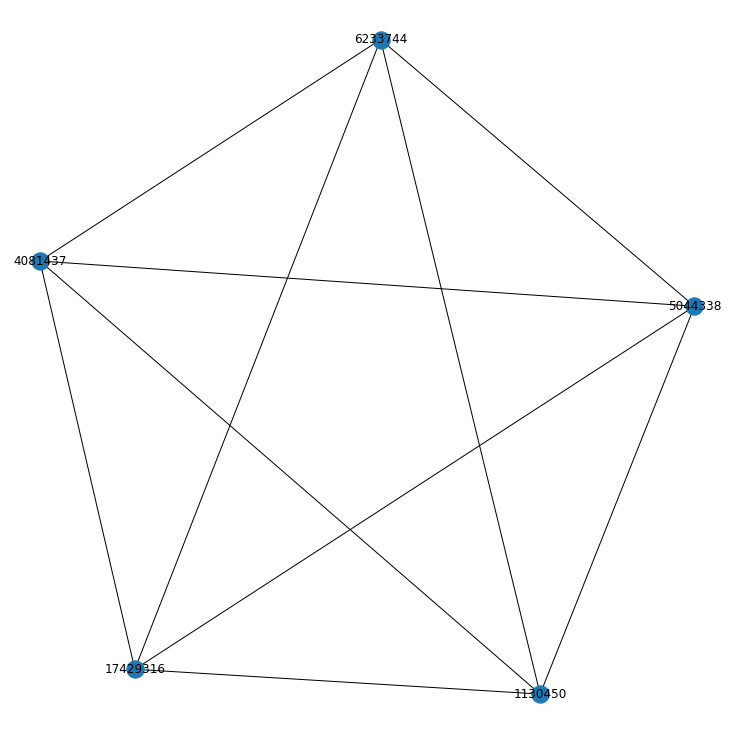

In [93]:
plt.rcParams['font.size'] = 40
fig = plt.figure(figsize = (10,10))
nx.draw(sG, with_labels = True)
fig.savefig('sg.jpg')

<b>Display the cliques that a certain cif is a member</b>

In [107]:
df_c[df_c['Clique_members'].apply(lambda x: 1 in x)]

,Clique_members,Clique_length
0,"[1, 107619]",2
1,"[1, 298503]",2
2,"[1, 586385]",2
3,"[1, 166676]",2
4,"[1, 5864255]",2
